# Introduction to Programming in Python, Mathematics, Statistics, and Modeling
## Lecture 4:
This lecture contains the contents: 
* Nonlinear equations
* Iterative methods to solve nonlinear equations
    * Bisection method
    * Newtons Method
* Examples

Second part of the lecture covers:
* An intro to statistics
    * Random Variable
    * Probability Density Function
    * Variance and Covariance
    * Linear Regression (covered in Linear Algebra lecture)
    * Simple Kriging
    * Variogram
* Some examples

This lecture starts with a brief recap of the previous lecture. Then we will introduce the concept of nonlinear equations and suggest two iterative methods that we can use to solve the nonlinear equations (using Python of course!). We will then code together both methods and apply them to a example (our own square root evaluator, exciting!). We will then deal with a 2x2 nonlinear system, which we will solve using Newton's Method. In the second half of the lecture we will introduce some concepts from statistics and do some examples. 

## Recap of lecture on numerical differentiation and integration:

<img style="float: left;" src="lecture_05/Slide29.PNG" width="100%">

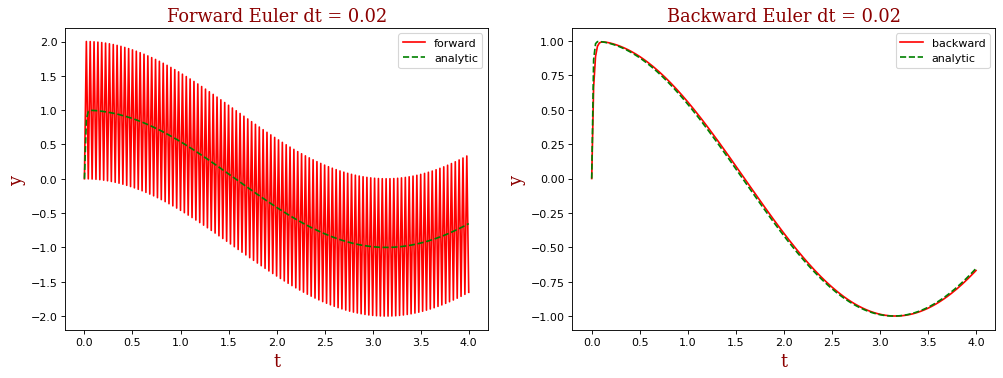

In [2]:
"""
Problem statement:
y' = -100(y - cos(t)) - sin(t)
y(0) = 0

Solve with Forward and Backward Euler schemes, stepsize of 0.2 for a total time of 4. Plot both solutions on the
interval [0, 4], on top of the exact solution which is given by:
y(t) = cos(t) - e^(-100t)

Forward Euler: y_n+1 = y_n + dt*f(t_n, y_n)
Backward Euler: y_n+1 = y_n + dt*f(t_n+1, y_n+1)

y_n+1 = (y_n + dt *(-100(cos(t)) - sin(t))) / (1 + dt*100)
"""
import numpy as np
from math import e, cos, sin, ceil
import matplotlib.pyplot as plt


# Define parameters:
dt = 0.02
tot_time = 4  
num_steps = ceil(tot_time / dt)
time_vec = np.linspace(0, tot_time, num_steps+1)

# Allocate mememory:
sol_forward = np.zeros((num_steps+1,))
sol_backard = np.zeros((num_steps+1,))

sol_forward[0] = 0
sol_backard[0] = 0

# Perform time-integration
for ii in range(num_steps):
    # Forward Euler:
    sol_forward[ii + 1] = sol_forward[ii] - 100 * dt * (sol_forward[ii] - cos(time_vec[ii])) - dt * sin(time_vec[ii])

    # Backward Euler:
    sol_backard[ii + 1] = (sol_backard[ii] + 100 * dt * cos(time_vec[ii]) - dt * sin(time_vec[ii])) / (1 + 100 * dt)

# Calculate exact solution:
sol_exact = np.zeros((num_steps+1,))
for ii in range(num_steps+1):
    sol_exact[ii] = -e ** (-100 * time_vec[ii]) + cos(time_vec[ii])

# plot with various axes scales
plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

# Forward Euler
plt.subplot(121)
plt.plot(time_vec, sol_forward, 'r', time_vec, sol_exact, 'g--')
plt.title('Forward Euler dt = ' + str(dt), fontdict=font)
plt.xlabel('t', fontdict=font)
plt.ylabel('y', fontdict=font)
plt.gca().legend(('forward','analytic'))

plt.subplot(122)
plt.plot(time_vec, sol_backard, 'r', time_vec, sol_exact, 'g--')
plt.title('Backward Euler dt = ' + str(dt), fontdict=font)
plt.xlabel('t', fontdict=font)
plt.ylabel('y', fontdict=font)
plt.gca().legend(('backward','analytic'))
plt.show()

<img style="float: left;" src="lecture_04/Slide25.PNG" width="100%">

<img style="float: left;" src="lecture_04/Slide30.PNG" width="100%">

## Simple example of ODE here (in-class exercise)
The example we will go through is the following:
* $ y' = 3t^2 + 2t + 1 - y = f(t, y(t)) $, with initial conditions: $ y(0) = 1 $.

This equation has the analytical solution: 
* $ y(t) = -4e^{-t} + 3t^3 - 4t + 5 $

**!!!** Convince yourself that this is true by filling the differential equation in (take the derivative and substitute back in the equation, also check for the initial condition) **!!!**

### Forward Euler
$ \frac{dy}{dt} \approx \frac{y(t_{n+1}) - y(t_{n})}{\Delta t} = f(t_{n}, y(t_{n})) $ 

$ y(t_{n+1}) = y(t_n) + \Delta t f(t_{n}, y(t_{n})) $

### Backward Euler
$ \frac{dy}{dt} \approx \frac{y(t_{n+1}) - y(t_{n})}{\Delta t} = f(t_{n+1}, y(t_{n+1})) $

$ y(t_{n+1}) = y(t_n) + \Delta t f(t_{n+1}, y(t_{n+1})) $


### Solving the actual problem:

In [ ]:
# simple ODE example
"""
Problem statement:
y' = 3*t^2 + 2*t + 1 - y
y(0) = 1

Solve with Forward and Backward Euler schemes, stepsize of 2.25 for a total time of 100. Plot both solutions on the
interval [0, 100], on top of the exact solution which is given by:
y(t) = -4e^(-t) + 3t^3 - 4t + 5

Forward Euler: y_n+1 = y_n + dt*f(t_n, y_n)
Backward Euler: y_n+1 = y_n + dt*f(t_n+1, y_n+1)
"""
import numpy as np
from math import e, cos, sin, ceil
import matplotlib.pyplot as plt


# Define parameters:
dt = 2.25
tot_time = 100
num_steps = ceil(tot_time / dt)
exact_steps = min(50000, 100 * num_steps)
time_vec = np.linspace(0, tot_time, num_steps+1)
time_vec_exact = np.linspace(0, tot_time, exact_steps+1)

# Allocate mememory:
sol_forward = np.zeros((num_steps+1,))
sol_backward = np.zeros((num_steps+1,))

# Set initial conditions:
sol_forward[0] = ???
sol_backward[0] = ???

# Perform time-integration
for ii in range(1, num_steps+1):
    # Forward Euler:
    sol_forward[ii] = ???

    # Backward Euler:
    sol_backward[ii] = ???

# Calculate exact solution:
sol_exact = np.zeros((exact_steps+1,))
for ii in range(exact_steps+1):
    sol_exact[ii] = ???


In [ ]:
# plot with various axes scales
plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

# Forward Euler
plt.subplot(121)
plt.plot(time_vec, sol_forward, 'r', time_vec_exact, sol_exact, 'g--')
plt.title('Forward Euler dt = ' + str(dt), fontdict=font)
plt.xlabel('t', fontdict=font)
plt.ylabel('y', fontdict=font)
plt.gca().legend(('forward','analytic'))

plt.subplot(122)
plt.plot(time_vec, sol_backward, 'r', time_vec_exact, sol_exact, 'g--')
plt.title('Backward Euler dt = ' + str(dt), fontdict=font)
plt.xlabel('t', fontdict=font)
plt.ylabel('y', fontdict=font)
plt.gca().legend(('backward','analytic'))
plt.show()

## Other concepts that remain unclear after your revision?
### Remember that the exam is on Friday and this will be one of the last moments at which you can ask questions :)!

---

## Nonlinear equations

<img style="float: left;" src="lecture_04/Slide31.PNG" width="100%">

### Solve the equation for pressure (difference):
Plug in all the relationships defined above. Use the following script to write a new "my_func" and simply plug into what we have developed above. 

I.e.:
$$ \frac{V_0}{E_0} = \frac{V_0 - \Delta V}{E} + W_i $$

Where the dependencies on pressure are:
$$ E_0 = E(p_0) = \frac{\alpha p_0}{Z(p_0) T} , \quad E(p) = \frac{\alpha p}{Z(p) T} $$

And for water (expansion):
$$ W_i = c_w W \Delta p = c_w W (p - p_0) $$ 

Rewrite the top equation, while plugging in all the relationships, such that we obtain the following equation:
$$ R(p) = 0 $$ 

**Question:** What is $\Delta V$???

This is what we call residual form. We can find the root of the residual equation, i.e. the solution p that satistifies this nonlinear equation. 

<img style="float: left;" src="lecture_04/Slide10.PNG" width="100%">

<img style="float: left;" src="lecture_04/Slide11.PNG" width="100%">

![NewtonMethod](lecture_04/NewtonIteration_Ani.gif "NewtonMethod")
source: https://en.wikipedia.org/wiki/Newton%27s_method

<img style="float: left;" src="lecture_04/Slide12.PNG" width="100%">

### Bisection:

In [ ]:
import numpy as np


# Bisection method:
# First we need to define the function for which we want to calculate the root
def my_function(x, a):
    return (???)

# Set some convergence parameters:
curr_iter = 0
max_iter = 100
threshold = 1e-12

# Define number for which to calculate root:
a = 2

# Get initial solution:
x_left = ???
x_right = ???

# Always test if there truly exists a root, i.e. is (f(a) * f(b) < 0) True?
does_root_exist = ???

if does_root_exist:
    print('There is a root on the interval :)')  
else:
    print('Change left and/or right boundaries, no root on interval :(')

# Find first guess:
x_new = ???

while ???:
    ### your code here ###

print('For bisection method:')
print("The square root of {:4.2f} is {:8.6f} (found after {:d} iterations)".format(a, x_new, curr_iter))

### Newton:

In [ ]:
import numpy as np


# Newtons method:
# First we need to define the function for which we want to calculate the root
def my_function(x, a):
    return (???)

# For Newton's method, we also need it's derivative:
def my_func_der(x):
    return (???)

# Set some convergence parameters:
curr_iter = 0
max_iter = 100
threshold = 1e-12

# Define number for which to calculate root:
a = 2

# Get initial solution:
x_old = ??? 
x_new = ???

while ???:
    ### your code here ###
    
print('For Newtons method:')
print("The square root of {:4.2f} is {:8.6f} (found after {:d} iterations)".format(a, x_new, curr_iter))

### Solve the equation for pressure - equivalent to the challenge assignment
Plug in all the relationships defined above. Use the following script to write a new "my_func" and simply plug into what we have developed above. 

I.e.:
$$ \frac{V_0}{E_0} = \frac{V_0 - \Delta V}{E} + W_i $$

Where the dependencies on pressure are:
$$ E_0 = E(p_0) = \frac{\alpha p_0}{Z(p_0) T} , \quad E(p) = \frac{\alpha p}{Z(p) T} $$

And for water (expansion):
$$ W_i = c_w W \Delta p = c_w W (p - p_0) $$ 

Rewrite the top equation, while plugging in all the relationships, such that we obtain the following equation:
$$ R(p) = 0 $$ 

**Question:** What is $\Delta V$???

This is what we call residual form. We can find the root of the residual equation, i.e. the solution p that satistifies this nonlinear equation. 

In [ ]:
def compute_E (p):
    return (???)

# input parameters
water_fraction = 1  # assume the reservoir volume of aquifer = volume of gas reservoir
depth = 2000
p0 = 200  # initial pressure in bar
poro = 0.3
h = 120

T = 10   # in years of extraction
Q = 500e6  # gas flowrate [m3/year]
gas_extracted_surf = ???  # delta_V

# pore-volume occupied by gas
pore_volume = 2000*3000*h*poro / 2 # here we assume only half of reservoir is available
E0 = compute_E(p0)

# surface volume of gas
volume = ???

# Compressibility factors:
rock_compr = 1e-5
water_compr = 1e-5 

def compute_residual(p):    
    return (???)


In [ ]:
# Set some convergence parameters:
curr_iter = 0
max_iter = 100
threshold = 1e-6

# Get initial solution:
x_left = ???
x_right = ???

# Always test if there truly exists a root, i.e. is (f(a) * f(b) < 0) True?
does_root_exist = ???

if does_root_exist:
    print('There is a root on the interval :)')  
else:
    print('Change left and/or right boundaries, no root on interval :(')

# Find first guess:
x_new = ???

while ???:
    ### your code here ###

print('For bisection method:')
print("The solution is {:8.6f} (found after {:d} iterations)".format(x_new, curr_iter))
print('Size of residual is {:4.3e}'.format(compute_residual(x_new)))

---

# Statistics

### Sample space: Set of possible outcomes of an experiment
<img style="float: middle;" src="statistics_pngs/sample_space.PNG" width="60%">


*-taken from Lecture of AESB2440-*

### Event: Subset of the sample space
I.e.: Event, E, is the sum of two dices equal to 4 --> $E = \{(1,3),(2,2),(3,1)\}$

<img style="float: middle;" src="statistics_pngs/set_theory.PNG" width="60%">

<img style="float: middle;" src="statistics_pngs/set_theory_2.PNG" width="60%">

### Probability: 
The extent to which an event is likely to occur, measured by the ratio of the favourable cases to the whole number of cases possible.

Take previous event as example: probability that you throw a sum equal to 4, i.e.:
$E = \{(1,3),(2,2),(3,1)\}$ --> $P(E) = P(\{(1,3),(2,2),(3,1)\}) = 3 / 36$, since favorable cases are 3, total number of cases are 36 (6 * 6). 

### Conditional probability:
Given that B is true, what is the probability of A, i.e. $P(A|B)$
<img style="float: left;" src="statistics_pngs/conditional_prob.PNG" width="100%">

*-taken from Lecture of AESB2440-*

Example:
* E1 = {exactly one of the eyes of the dice is equal to 1}
* E2 = {sum of the eyes of the dice equals 4}

What is P(E1) given that E2 holds --> $P(E1|E2)$?

E1 intersection with E2 (i.e. shared elements in two sets):
$$E1 \cap E2 = \{(1,3),(2,2),(3,1)\} \cap \{(1,2), (1,3), ..., (1,6), (6,1), (5,1), ..., (3,1), (2,1)\} = \{(1,3), (3,1)\}$$

Probability E1 intersection with E2:
$$P(E2\cap E1) = 2/36$$

Now, probability of E2 we already know from previous example:
$$P(E2) = P(\{(1,3),(2,2),(3,1)\}) = 3/36$$

Therefore:
$$P(E1|E2) = \frac{P(E2\cap E1)}{P(E2)} = 2/3$$


### Random variable: 
**Informal**: Variable whose values depend on outcomes of a random phenomenon

**Formal**: Measurable function defined on a probability space whose outcomes are typically real numbers.

<img style="float: left;" src="statistics_pngs/random_variable.PNG" width="100%"> 

*-taken from Lecture of AESB2440-*

<img style="float: left;" src="statistics_pngs/prob_mass_function_discrete.PNG" width="100%"> 

*-taken from Lecture of AESB2440-*

<img style="float: middle;" src="statistics_pngs/prob_mass_function_discrete_example.PNG" width="60%">

*-taken from Lecture of AESB2440-*

For a continuous random variable we cannot simply define the probability of $ p(a) = P(X = a)$ since there are infinite of values that a can attain, hence the probability $p(a) = 0$. Instead we have to define the probability over a certain interval. Probability is given in this case (a continuous random variable) by: 
$$ P(a \leq X \leq b) = \int_a^b{f_X(x)dx} $$

where $f_X(x)$ is the probability density (i.e. mass) function (**PDF**).

Also note that the distribution function, most often refered to as cumulative probability function (**CDF**), for a continuous variable is calculated in a similar manner:
$$ F(X) = \int_{-\infty}^{x}{f_X(\tau)d\tau} $$

### Example of continuous random variable (PDF and CDF)

<img style="float: left;" src="statistics_pngs/pdf_cdf_example.PNG" width="100%"> 

*-taken from Lecture of AESB2440-*

Above is a special PDF, particularly the standard normal distribution for a continuous random variable, defined as follows:

$$ f_X(X|\mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}}e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$

where $\sigma$ and $\sigma ^2$ is the standard deviation and variance respecitvely.  

## Other important concepts

### Mean and Expectation
#### Population mean: mean value of the whole population (often unknown!)
#### Sample mean: mean value of the samples  (taken from the population)
$$ \bar{x} = \frac{x_1 + x_2 + ... + x_n}{n} $$
#### Expectation: can be seen as the probability (relative frequency) weighted average/mean
Continuous case: 
$$ E[X] = \int_{z\in R}{zf(z)dz} = \mu $$
Discrete case:
$$ E[X] = \sum_{i=1}^{n}{p_i z_i}$$

#### Please note that mean and expectation are often used interchangably. Expectation is indeed simply the arithmetic mean. Take the following example:
outcomes = {1, 1, 2, 2, 2, 3}

mean = sum_outcomes / number_outcomes = (1 + 1 + 2 + 2 + 2 + 3)/6 = 1.83

probability/relative_frequency = {2/6, 3/6, 1/6} (for 1, 2, 3 respectively)

expectation = sum( p_i * x_i ) = 2/6 * 1 + 3/6 * 2 + 1/6 * 3 = 1.83

If you look closely you can simply write this sum 2/6 * 1 + 3/6 * 2 + 1/6 * 3 as (2 * 1 + 3 * 2 + 1 * 3)/6 since they have a common denominator and this further can be expanded as (1 + 1 + 2 + 2 + 2 + 3)/6 **which is exactly how we caclulated the mean, showing that the mean and expectation in this case are exactly the same thing!**

In [ ]:
# Exercises on: Mean and Expectation
import numpy as np


# Load data set from porosity_data_shale.txt, assuming this is the whole population!!!:
population = ???
size_population = ???

# Extract a few samples using random integer indexing (take 5 samples)
num_samples = 5

samples_id = []
samples_added = 0
while (samples_added < num_samples):
    rand_id = np.random.randint(0, size_population)
    
    if rand_id not in samples_id:
        samples_id.append(rand_id)
        samples_added += 1

samples = population[samples_id]


In [ ]:
# Calculate and compare sample mean versus population mean:
sample_mean = ???
population_mean = ???

print('Sample mean = ', sample_mean)
print('Population mean = ', population_mean)

# Expectation:
# Calculate the expectation of a discrete variable, result of a single dice roll:
result_die = ???
probability = ???

expectation = ???

print('Expectation of fair dice roll = ', expectation)

# Now what about an unfair die:
# i.e. a die that is way(!) more likely to give a 6 as a result
# i.e. p_6 = 0.5, p_1,2,...,5 = ???
### your code here ###

expectation = ???

print('Expectation of new unfair dice roll = ', expectation)

### Variance and Standard Deviation
Variance is often refered to as a the spread, or in more technical terms the average squared deviation from the mean.

#### Sample variance: the average squared deviation from the sample(!) mean
$$ s_n^2 = \frac{1}{n - 1}\sum_{i = 1}^{n}{(x_i - \hat{x})^2} $$

Technical remark: the term $1/(n - 1)$ is used to make it an **unbiased sample variance**. In practical cases, the sample size (n) is often large enough to neglect this difference (as we see in an example below). See https://en.wikipedia.org/wiki/Bias_of_an_estimator and https://en.wikipedia.org/wiki/Bessel%27s_correction#Source_of_bias for more information.

#### Sample standard deviation: the square root of the sample variance
$$ s_n = \sqrt{s_n^2} $$

#### Variance is often also referred to as the second stochastic moment, i.e. second moment about the mean:
Theoretical case:
$$ \text{var}(X) = E[(X - E[X])^2] = E[(X - \mu)^2] = \sigma^2 $$

#### NOTE:
Variance is not a unitless quantity, just like the expectation or mean! Therefore, having a high number for the variance doesn't necessarily mean that the spread is large and vice versa (e.g. mean = 1e6, var = 100 vs. mean = 0, var = 1)! Always consider the relative quantities!

In [ ]:
# Exercises on: Variance and Standard Deviation
# Extract a few samples using random integer indexing (take 5 samples)     
def mean_samples(sample_array):
    return ???

# Calculate sample variance and population variance:
def sample_variance_biased(sample_array):
    return ???

def sample_variance_unbiased(sample_array):
    return ???

num_samples = 5
samples_id = []
samples_added = 0
while (samples_added < num_samples):
    rand_id = np.random.randint(0, size_population)
    
    if rand_id not in samples_id:
        samples_id.append(rand_id)
        samples_added += 1
        

In [ ]:
samples = np.array(population[samples_id], copy=False)

# Biased:
biased_sample_var = sample_variance_biased(samples)

# Unbiased:
unbiased_sample_var = sample_variance_unbiased(samples)

# Numpy var:
numpy_sample_var = np.var(samples)

# Print results:
print('Biased Sample Variance: ', biased_sample_var)
print('Unbiased Sample Variance: ', unbiased_sample_var)
print('Numpy Sample Variance: ', numpy_sample_var)

# What about population:
print('Population variance: ', np.var(population))

e) Plot the histogram, fit the analytical continuous PDF, compute the following probability: 
* $ P(|X - \mu| \leq \sigma ) $
* $ P(0.0 \leq X - \mu \leq 0.10 ) $

Recall that the probability is given by (for a continuous random variable): 

$$ P(a \leq X \leq b) = \int_a^b{f_X(x)dx} $$

Also recall that the trapezoidal rule gives us:

$$ \int_a^b{f_X(x)dx} \approx \sum_{i=1}^n{\frac{f_X(x_{i-1}) + f_X(x_i)}{2} \Delta x} $$

In [ ]:
# Now, fit gaussian distribution, plot, and calculate probabilities
from math import pi, exp


# Histogram:
plt.figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

plt.hist(population, 20)
plt.title('Histogram Porosity Data', fontdict=font)
plt.xlabel('porosity', fontdict=font)
plt.ylabel('frequency', fontdict=font)
plt.show()

mu = ???
sigma = ???

def my_gaussian_distribution(x):
    return ???

my_distribution = np.zeros((size_population,))

for ii in range(size_population):
    my_distribution[???] = ???
    
# Plot distribution:
plt.figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

plt.plot(population, my_distribution)
plt.title('Probability Distribution', fontdict=font)
plt.xlabel('porosity', fontdict=font)
plt.ylabel('probability', fontdict=font)
plt.show()


In [ ]:
# Calculate probability that a new porosity measurement in the region is between 0 and 0.10:
# Use integration
def my_func(x):
    return ( ??? )

def my_integral_func(sigma_factor):
    ### your code here ###
    return ???

print('Probability 1: ', my_integral_func(1))

num_p = 1000
int_low = 0
int_high = 0.1
int_len = int_high - int_low
dx = int_len / num_p

int_sum = 0
a = int_low

for ii in range(num_p):
    ### your code here ###
    
print('Probability 2: ', int_sum)

## Additional topics to read upon:
1) Joint Probability Distributions

2) Covariance

3) Correlation

4) Covariance Function and Variogram

5) Kriging

In the three resources given on the BrightSpace you can find all the necessary details on these subjects. 

You will use these concepts in further classes, so it is worth to investigate some time into learning these concepts. However, it will not be mandatory to know these additional topics on the exam (the basic statistics covered above will be possibily tested on the exam). 

---